In [1]:
#Загрузка необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

1. (1 балл) Загрузите предложенный вам датасет с помощью функции sklearn.datasets.fetch_openml. Выведите текстовое описание загруженного датасета. Определите какая бизнес-задача ставится. Переведите бизнес-задачу в задачу машинного обучения.

In [2]:
data = fetch_openml(name="user-knowledge", as_frame=True, parser="pandas")

In [3]:
#Получим текстовое описание датасета
print(data.DESCR)

**Author**:   
**Source**: UCI    
**Please cite**:  H. T. Kahraman, Sagiroglu, S., Colak, I., Developing intuitive knowledge classifier and modeling of users' domain dependent data in web, Knowledge Based Systems, vol. 37, pp. 283-295, 2013.   

* Title:  

User Knowledge Modeling Data Set 

* Abstract: 

It is the real dataset about the students' knowledge status about the subject of Electrical DC Machines. The dataset had been obtained from Ph.D. Thesis.

* Source:

-- Creators: Hamdi Tolga Kahraman (htolgakahraman '@' yahoo.com) 
-- Institution: Faculty of Technology, Department of Software Engineering, Karadeniz Technical University, Trabzon, Turkiye 
-- Creators: Ilhami Colak (icolak '@' gazi.edu.tr) 
-- Institution: Faculty of Technology, Department of Electrical and Electronics Engineering, Gazi University, Ankara, Turkiye 
-- Creators: Seref Sagiroglu (ss '@' gazi.edu.tr) 
-- Institution: Faculty of Technology, Department of Computer Engineering, Gazi University, Ankara, Turki

In [4]:
#Подробная информация о наборе данных
data.details

{'id': '1508',
 'name': 'user-knowledge',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2015-05-25T23:22:18',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/1592300/user-knowledge.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/1508/dataset_1508.pq',
 'file_id': '1592300',
 'default_target_attribute': 'Class',
 'tag': ['Chemistry',
  'Life Science',
  'mf_less_than_80',
  'study_123',
  'study_50',
  'study_7',
  'study_88'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/1508/dataset_1508.pq',
 'status': 'active',
 'processing_date': '2018-10-03 21:36:23',
 'md5_checksum': '10027b394118c0faabc15e99ded4fa66'}

Класс знаний пользователей классифицирован авторами
использование интуитивного классификатора знаний. нам представленна множественная классификация.

Информация об атрибутах:

СТГ (Степень исследования материалов целевого объекта), (входное значение)
SCG (степень повторения пользователя для материалов целевого объекта) (входное значение)
STR (Степень изучения пользователем объектов, связанных с целевым объектом) (входное значение)
LPR (успехи пользователя на экзамене по объектам, связанным с целевым объектом) (входное значение)
PEG (успехи пользователя на экзамене по целевым объектам) (входное значение)
UNS (Уровень знаний пользователя) (целевое значение)

2. (1 балл) Проведите предварительный анализ датасета. Выведите основную статистическую информацию о данных. Проверьте дисбаланс целевого признака.

In [5]:
#Определим целевую переменную и признаки. Сделаем целевую переменную фреймом
X = data.data
y = data.target

In [6]:
# Вывод количества строк и столбцов
num_rows, num_col = X.shape
print(f"Число строк (объектов): {num_rows}")
print(f"Число столбцов (признаков): {num_col}")

# Выведим статистику по признакам
print("Статистика по признакам:")
print(X.describe())

# Количество классов (значений целевой переменной)
num_class = y.nunique()
print(f"Количество классов (значений целевой переменной): {num_class}")

Число строк (объектов): 403
Число столбцов (признаков): 5
Статистика по признакам:
               V1          V2          V3          V4          V5
count  403.000000  403.000000  403.000000  403.000000  403.000000
mean     0.353141    0.355940    0.457655    0.431342    0.456360
std      0.212018    0.215531    0.246684    0.257545    0.266775
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.200000    0.200000    0.265000    0.250000    0.250000
50%      0.300000    0.300000    0.440000    0.330000    0.400000
75%      0.480000    0.510000    0.680000    0.650000    0.660000
max      0.990000    0.900000    0.950000    0.990000    0.990000
Количество классов (значений целевой переменной): 5


In [7]:
y.value_counts()

Class
2    129
3    122
1    102
5     26
4     24
Name: count, dtype: int64

**Можно говорить про дисбаланс классов**

3.
(1 балл) Убедитесь, что данные пригодны для моделирования. В данных не должно быть пропущенных значений, все признаки должны быть численными. Если эти условия нарушаются, исправьте это.

In [8]:
non_numeric_columns = X.select_dtypes(exclude=[float, int]).columns
if not non_numeric_columns.empty:
    X = X.drop(columns=non_numeric_columns)
# Проверка наличия пропущенных значений в данных
missing_values = X.isnull().sum()
print("Пропущенные значения в данных:\n", missing_values)
# Замена пропущенных значений, например, средними значениями по столбцам
X = X.fillna(X.mean())
# Повторная проверка наличия пропущенных значений после преобразований
missing_values2 = X.isnull().sum()
print("\nПропущенные значения после обработки:\n", missing_values2)

Пропущенные значения в данных:
 V1    0
V2    0
V3    0
V4    0
V5    0
dtype: int64

Пропущенные значения после обработки:
 V1    0
V2    0
V3    0
V4    0
V5    0
dtype: int64


In [9]:
X.info() #пропущенных значений в данных нет, также все столбцы числовые

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      403 non-null    float64
 1   V2      403 non-null    float64
 2   V3      403 non-null    float64
 3   V4      403 non-null    float64
 4   V5      403 non-null    float64
dtypes: float64(5)
memory usage: 15.9 KB


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

4. (1 балл) Обучите любую линейную модель, которая решает поставленную задачу. Выведите с помощью метода score() результат метрики оценки модели. Опишите какая метрика подсчитывается в методе score().

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
# Разделяем данные на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Обучаем линейную модель (логистическую регрессию)
model = LogisticRegression(multi_class = 'ovr')
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [15]:
# Оцениваем качество модели с помощью метода score(), который в случае классификации возвращает точность (accuracy)
score = model.score(X_test, y_test)
print("Результат метрики оценки модели (Accuracy score):", score)

Результат метрики оценки модели (Accuracy score): 0.8024691358024691


Метод score() в случае классификации возвращает точность модели (accuracy), которая представляет собой долю правильно классифицированных объектов от общего количества объектов. Точность вычисляется как отношение числа правильно предсказанных классов ко всем предсказанным классам. Значение точности также может быть переведено в проценты. Чем ближе точность к 1, тем лучше модель классифицирует данные.

5. (1 балл) К поставленной задачи машинного обучения подберите еще 3 метрики. С помощью их оцените обученную линейную модель.

In [16]:
# Оцениваем качество модели с помощью трёх метрик: f1_score, precision, recall
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("f1_score:", f1)
print("Precision:", precision)
print("Recall:", recall)

f1_score: 0.770359540827377
Precision: 0.7734167067500402
Recall: 0.8024691358024691


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1 = f1_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("f1_score:", f1)
print("Precision:", precision)
print("Recall:", recall)

f1_score: 0.8024691358024691
Precision: 0.8024691358024691
Recall: 0.8024691358024691


In [19]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1= f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("f1_score:", f1)
print("Precision:", precision)
print("Recall:", recall)

f1_score: 0.60875104427736
Precision: 0.6404329004329005
Recall: 0.6186813186813187


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


У нас неравнозначность классов, поэтому модель macro показывает заниженные результаты. Параметр 'weighted': используем при дисбалансе классов для оценки производительности модели с учетом весов классов.Параметр 'micro': используем при дисбалансе классов для оценки общей производительности модели.

В данном случае самым полезным будет параметр  'weighted'. используя f1_score, precision, recall, accuracy можно сказать что модель обучени средне, показатели около 80%, возможно для улучшения стоит рассмотреть другую модель.

6. (1 балл) Для задач классификации: Постройте для этой модели кривые ROC. Вычислите для этой модели метрики площади под кривыми ROC-AUC. Найдите оптимальное значения порога модели.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, classification_report

In [ ]:
y_pred_proba = model.predict_proba(X_test)

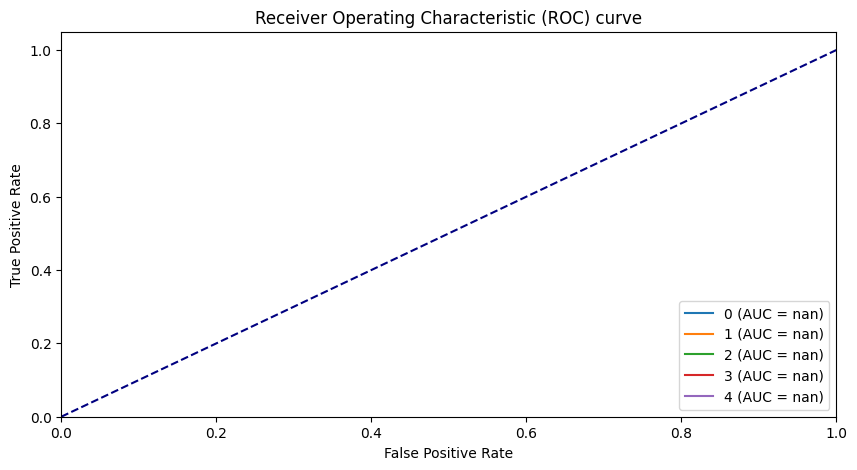

In [ ]:
#import warnings
#warnings.filterwarnings("ignore", category=UserWarning)

plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

для данного метода пишет, что данных y_true не содержатся, используем yellowbrick

In [ ]:
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve

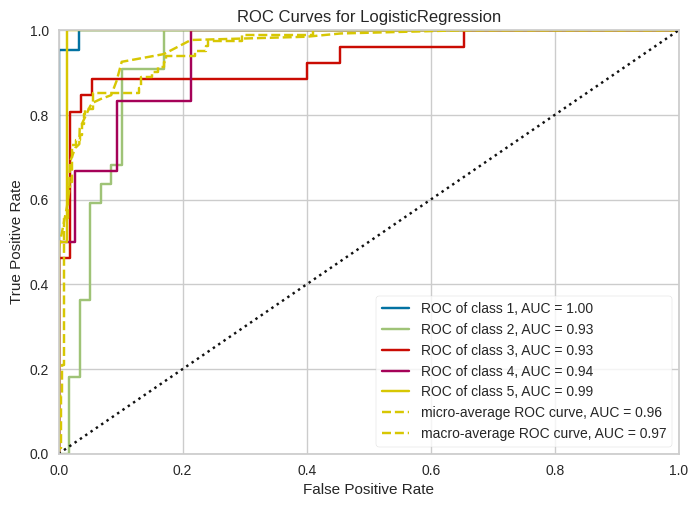

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
#model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=['1', '2', '3', '4', '5'])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

7. (1 балл) Для задач классификации: Постройте для этой модели кривые PR. Вычислите для этой модели метрики площади под кривыми PR-AUC. Найдите оптимальное значения порога модели.

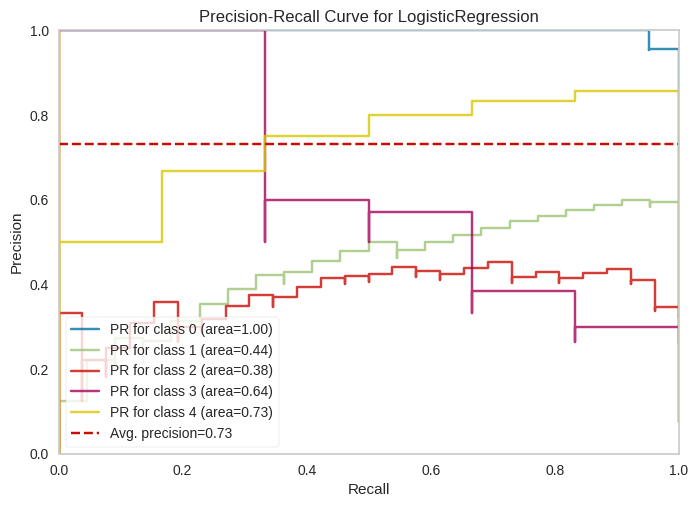

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
viz = PrecisionRecallCurve(model, per_class=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

лучшее значения порога = 0.73

8. (1 балл) Обоснуйте выбор типа разбиения данных при кросс-валидации для вашей задачи машинного обучения. Обучите любую другую модель используя кросс-валидацию данных.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [ ]:
model_r = RandomForestClassifier()
model_r.fit(X_train, y_train)

# Создание Stratified K-fold кросс-валидации с 5 блоками
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Оценка модели с использованием кросс-валидации
scores = cross_val_score(model_r, X, y, cv=kfold)

# Вывод результатов кросс-валидации
print("Средняя точность:", scores.mean())

Средняя точность: 0.9183024691358025


In [ ]:
cv_results = cross_val_score(model_r,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = kfold,                # тип разбиения (можно указать просто число фолдов cv = 3)
                             scoring = 'accuracy',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Кросс-валидация:  [0.88888889 0.85185185 0.90123457 0.925      0.9625    ]
Среднее по кросс-валидации:  0.9058950617283952
Дисперсия по кросс-валидации:  0.03688012026611166


Для моей задачи машинного обучения я бы выбрала Stratified K-fold кросс-валидацию, особенно в моих данных присутствует дисбаланс классов. Этот метод обеспечивает справедливое разделение данных на обучающие и тестовые наборы с сохранением пропорций классов.

9. Проведите диагностику любой модели. Постройте кривые обучения. Сделайте вывод о переобученности или недообученности модели

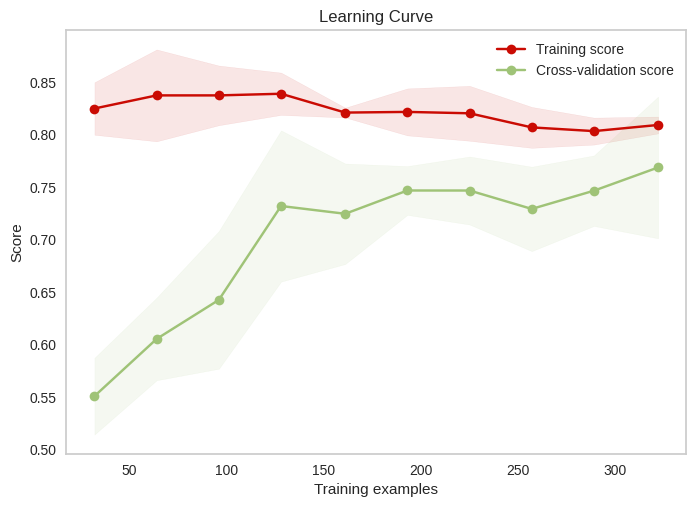

In [ ]:
from sklearn.model_selection import learning_curve


# Определение размеров обучающего набора данных, для которых мы хотим построить кривые обучения
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Вычисление средних значений и стандартных отклонений для кривых обучения
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Построение кривых обучения
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

# Построение кривых обучения
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

# Добавление легенды
plt.legend(loc="best")

# Вывод графика
plt.show()

мы можем видеть, что в целом модель хорошо обучена. В начале прослеживалось недообучение, потом модель хорошо обучилась. В конце маленький промежуток между тестовой и трейновой выборкой.

10. Исследуйте как любой из гиперпараметров модели влияет на эффективность модели.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators' : [10, 20, 50,70,80,90, 100, 200]}
grid_model = GridSearchCV(estimator=model_r,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=kfold,
                          verbose=2)

In [ ]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ....................................n_estimators=20; total time=   0.2s
[CV] END ....................................n_estimators=20; total time=   0.1s
[CV] END ....................................n_estimators=20; total time=   0.1s
[CV] END ....................................n_estimators=20; total time=   0.1s
[CV] END ....................................n_estimators=20; total time=   0.1s
[CV] END ....................................n_estimators=50; total time=   0.2s
[CV] END ....................................n_es

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 20, 50, 70, 80, 90, 100, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
grid_model.best_estimator_

RandomForestClassifier(n_estimators=70)

с кросс-валидацией лучшее значение 70 для гиперпараметра n_estimators.